In [1]:
from braincoder.models import SigmoidModel, GaussianReceptiveFieldModel, CombinedModel
import pandas as pd
import numpy as np
import scipy.stats as ss
import tensorflow as tf
import seaborn as sns

/Users/gdehol/git/braincoder/braincoder/models.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
n_pars1 = 6
n_pars2 = 5

parameters = pd.DataFrame(np.zeros((n_pars1, 4)), columns=['baseline', 'range', 'middle', 'slope'])


parameters['range'] = 1
parameters.iloc[:-1]['middle'] = np.linspace(0., 1., n_pars1-1, endpoint=True)
parameters.loc[n_pars1-1, 'baseline'] = 1
parameters.loc[n_pars1-1, 'range'] = 0
parameters['slope'] = 15.

weights = np.zeros((n_pars1, n_pars1+n_pars2))
weights[range(n_pars1), range(n_pars1)] = 1


model1 = SigmoidModel(parameters=parameters, weights=weights)

/Users/gdehol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [3]:

parameters = pd.DataFrame(np.ones((n_pars2, 4)), columns=['mu', 'sd', 'amplitude', 'baseline'])
parameters['mu'] = np.linspace(.075, 1. - .075, n_pars2)
parameters['sd'] = .075
parameters['baseline'] = 0

weights = np.zeros((n_pars2, n_pars1+n_pars2))
weights[range(n_pars2), range(n_pars1, n_pars1+n_pars2)] = 1


model2 = GaussianReceptiveFieldModel(parameters=parameters, weights=weights)

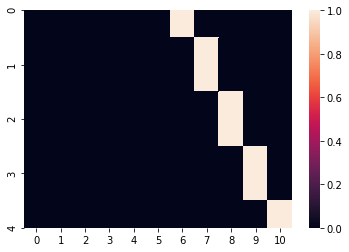

In [4]:
sns.heatmap(model2.weights)

In [5]:
paradigm = np.linspace(0, 1, 50)[:, np.newaxis]

In [6]:
model = CombinedModel([model1, model2])

/Users/gdehol/git/braincoder/braincoder/models.py:1483: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  axis=0)


In [7]:
import seaborn as sns

In [8]:
data = model.simulate(paradigm=paradigm, noise=.5)

/Users/gdehol/git/braincoder/braincoder/models.py:1619: RuntimeWarning: divide by zero encountered in log
  return np.min((np.log(np.exp(x) - 1), x), 0)




Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor




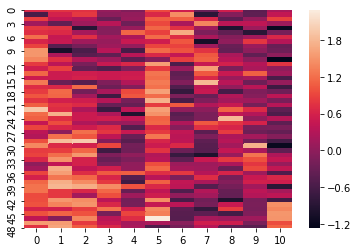

In [9]:
sns.heatmap(data)

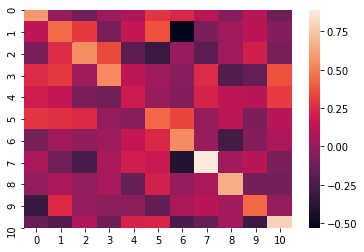

In [10]:
sns.heatmap(model.fit_weights(paradigm, data, l2_cost=1.))

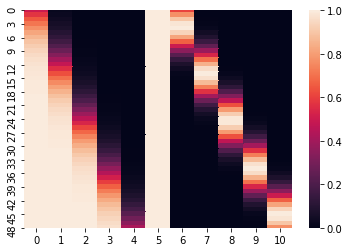

In [11]:
sns.heatmap(model.get_basis_function_activations())

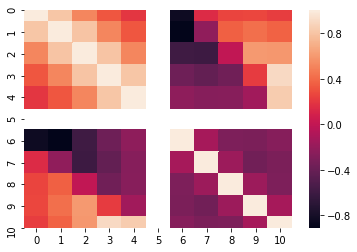

In [12]:
sns.heatmap(model.get_basis_function_activations().corr())

In [13]:
model.fit_residuals(paradigm=paradigm, data=data)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
This op will be removed after the deprecation date. Please switch to tf.sets.difference().

Instructions for updating:
Prefer Variable.assign which has equivalent behavior in 2.X.


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub message rate exceed

(array([394.06521606, 393.97698975, 393.88919067, ..., 375.83776855,
        375.83770752, 375.83770752]),
 (0.0008387656, 0.12335422, array([[0.26332453],
         [0.40475997],
         [0.31796372],
         [0.27815166],
         [0.33670148],
         [0.36985713],
         [0.29830396],
         [0.38578832],
         [0.24886586],
         [0.2604048 ],
         [0.41831505]], dtype=float32), array([[1.92694023e-01, 8.93983452e-05, 7.02278703e-05, 6.14346791e-05,
          7.43664350e-05, 8.16894390e-05, 6.58856661e-05, 8.52081212e-05,
          5.49663928e-05, 5.75149716e-05, 9.23922271e-05],
         [8.93983452e-05, 2.87184864e-01, 1.07948283e-04, 9.44321364e-05,
          1.14309725e-04, 1.25566032e-04, 1.01273814e-04, 1.30974644e-04,
          8.44896495e-05, 8.84071051e-05, 1.42017423e-04],
         [7.02278703e-05, 1.07948283e-04, 2.24455148e-01, 7.41822223e-05,
          8.97972786e-05, 9.86397936e-05, 7.95567830e-05, 1.02888596e-04,
          6.63717874e-05, 6.94491828e

In [14]:
stimulus_range=np.linspace(0, 1., 50).astype(np.float32)[:, np.newaxis]
normalize=True

/Users/gdehol/git/braincoder/braincoder/models.py:1619: RuntimeWarning: divide by zero encountered in log
  return np.min((np.log(np.exp(x) - 1), x), 0)


[[0.47474748]
 [0.02020202]
 [0.1010101 ]
 [0.23232323]
 [0.13131313]
 [0.07070707]
 [0.15151516]
 [0.02020202]
 [0.13131313]
 [0.16161616]
 [0.22222222]
 [0.1919192 ]
 [0.33333334]
 [0.26262626]
 [0.32323232]
 [0.35353535]
 [0.27272728]
 [0.3939394 ]
 [0.3131313 ]
 [0.3939394 ]
 [0.41414142]
 [0.14141414]
 [0.44444445]
 [0.54545456]
 [0.4949495 ]
 [0.3838384 ]
 [0.45454547]
 [0.54545456]
 [0.6060606 ]
 [0.5959596 ]
 [0.68686867]
 [0.57575756]
 [0.68686867]
 [0.67676765]
 [0.64646465]
 [0.72727275]
 [0.7777778 ]
 [0.7777778 ]
 [0.7878788 ]
 [0.7979798 ]
 [0.8080808 ]
 [0.8181818 ]
 [0.8181818 ]
 [0.8888889 ]
 [0.9191919 ]
 [0.9292929 ]
 [0.9191919 ]
 [1.        ]
 [1.        ]
 [1.        ]]


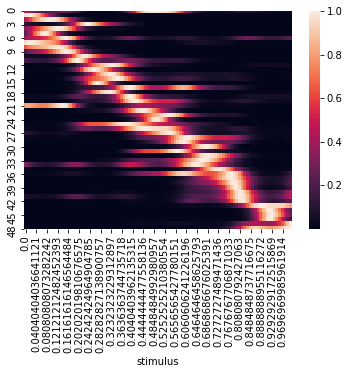

In [15]:
d, map_, sd, (low, high) = model.get_stimulus_posterior(data, stimulus_range=np.linspace(0, 1, 100), normalize=True)
sns.heatmap(d)

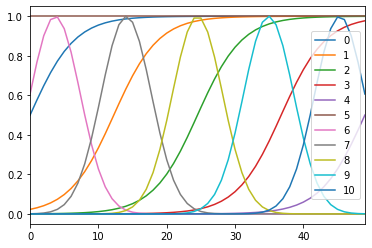

In [16]:
model.get_basis_function_activations(paradigm).plot()